In [19]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_merge = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
city_ride_merge.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


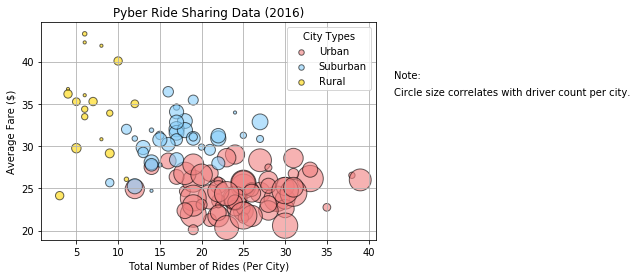

In [20]:
# Create varibles/data tables for the city types
urban = city_ride_merge.loc[city_ride_merge["type"] == "Urban"]
suburbs = city_ride_merge.loc[city_ride_merge["type"] == "Suburban"]
rural = city_ride_merge.loc[city_ride_merge["type"] == "Rural"]

#Calculate avg fare/city, total rides/city, total drivers/city
urban_avg_fare = urban.groupby("city")["fare"].mean()
urban_total_rides = urban.groupby("city")["ride_id"].count()
urban_total_drivers = urban.groupby("city")["driver_count"].mean()

suburbs_avg_fare = suburbs.groupby("city")["fare"].mean()
suburbs_total_rides = suburbs.groupby("city")["ride_id"].count()
suburbs_total_drivers = suburbs.groupby("city")["driver_count"].mean()

rural_avg_fare = rural.groupby("city")["fare"].mean()
rural_total_rides = rural.groupby("city")["ride_id"].count()
rural_total_drivers = rural.groupby("city")["driver_count"].mean()

 # Set x, y and s axis for city types
urban_x = urban_total_rides
urban_y = urban_avg_fare
urban_s = urban_total_drivers

suburb_x = suburbs_total_rides
suburb_y = suburbs_avg_fare
suburb_s = suburbs_total_drivers

rural_x = rural_total_rides
rural_y = rural_avg_fare
rural_s = rural_total_drivers

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, urban_s*10, color="LightCoral", edgecolors="Black", alpha=0.6, linewidth=1.0, label="Urban")
plt.scatter(suburb_x, suburb_y, suburb_s*10, color="LightSkyBlue", edgecolors="Black", alpha=0.6, linewidth=1.0, label="Suburban")
plt.scatter(rural_x, rural_y, rural_s*10, color="Gold", edgecolors="Black", alpha=0.6, linewidth=1.0, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(loc=1, title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43, 38, "Note:")
plt.text(43, 36, "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberPlot.png")
plt.show()

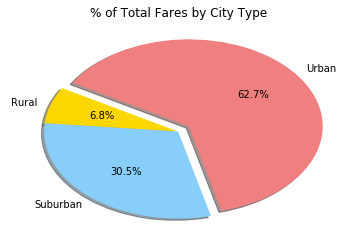

<Figure size 432x288 with 0 Axes>

In [25]:
# Calculate percentage of total fares by city type
total_fares = city_ride_merge["fare"].sum()
urban_fare_perc = (urban["fare"].sum() / total_fares) * 100
suburb_fare_perc = (suburbs["fare"].sum() / total_fares) * 100
rural_fare_perc =(rural["fare"].sum() / total_fares) * 100

# Build Pie Chart
city_types = ["Rural", "Suburban", "Urban"]
fare_perc = [rural_fare_perc, suburb_fare_perc, urban_fare_perc]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(fare_perc, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig("FaresPie.png")

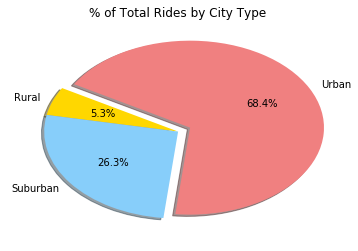

<Figure size 432x288 with 0 Axes>

In [22]:
# Calculate percentage of total rides by city type
total_ride_perc = city_ride_merge.groupby("type")["ride_id"].count()
total_ride_perc
# Build Pie Chart
# Labels for section of the pie chart
city_types = ["Rural", "Suburban", "Urban"]

# Colors for each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)

plt.pie(total_ride_perc, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig("RidesPie.png")

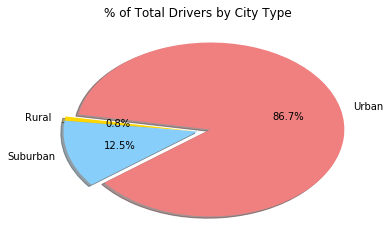

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate percentage of total drivers by city type
drivers_per_city = city_ride_merge.groupby("type")["driver_count"].sum()


# Build Pie Charts
# Labels for section of the pie chart
city_types = ["Rural", "Suburban", "Urban"]

# Colors for each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)

plt.pie(drivers_per_city, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
#plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("DriversPie.png")